In [96]:
# Imports necesarios para el notebook
from random import seed, randint
import os

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

from util import time_algorithm
from tp1 import es_culpable, leer_archivo_test

# convertimos un archivo "tests_generados/1333-es.txt" a "1333"
def acortar(archivo):
    archivo = archivo.split("-es.txt")[0]
    archivo = archivo.split("tests_generados/")[1]
    return int(archivo)

# Siempre seteamos la seed de aleatoridad para que los resultados sean reproducibles
semilla = randint(1, 500)
seed(12345 * semilla)
np.random.seed(12345 * semilla)
sns.set_theme()

In [97]:
carpeta = "tests_generados"
archivos = [f"{carpeta}/{archivo}" for archivo in os.listdir(carpeta)]
# hay que ordenar por el numero que esta contenido en el archivo (ya convertido en int), osea usar 1333 en vez de
# "tests_generados/1333-es.txt", ya que sino se ordenan por letra
archivos.sort(key = lambda archivo: acortar(archivo))
# como ya genere 100 sets de datos, filtramos la mitad, pero no eligo directamente la primera mitad, sino que los pares
# , asi tenemos sets desde los mas chicos hasta los mas grandes
archivos = archivos[:60]
# archivos_filtrados = []
# for index, archivo in enumerate(archivos):
#     if index % 2 == 0:
#         archivos_filtrados.append(archivo)
# archivos = archivos_filtrados
results = time_algorithm(es_culpable, archivos, lambda archivo: [*leer_archivo_test(archivo)])
print(results)

{'tests_generados/289-es.txt': 0.009545397758483887, 'tests_generados/442-es.txt': 0.021698427200317384, 'tests_generados/945-es.txt': 0.10287272930145264, 'tests_generados/1000-es.txt': 0.1071955680847168, 'tests_generados/1152-es.txt': 0.15735352039337158, 'tests_generados/1167-es.txt': 0.14466264247894287, 'tests_generados/1186-es.txt': 0.15561583042144775, 'tests_generados/1200-es.txt': 0.16241729259490967, 'tests_generados/1234-es.txt': 0.15691752433776857, 'tests_generados/1251-es.txt': 0.17831146717071533, 'tests_generados/1290-es.txt': 0.16903059482574462, 'tests_generados/1621-es.txt': 0.2702728271484375, 'tests_generados/1638-es.txt': 0.2788362503051758, 'tests_generados/1729-es.txt': 0.31214032173156736, 'tests_generados/1991-es.txt': 0.37990460395812986, 'tests_generados/2016-es.txt': 0.40149171352386476, 'tests_generados/2152-es.txt': 0.4596304178237915, 'tests_generados/2297-es.txt': 0.5490603685379029, 'tests_generados/2354-es.txt': 0.6395142555236817, 'tests_generados/2

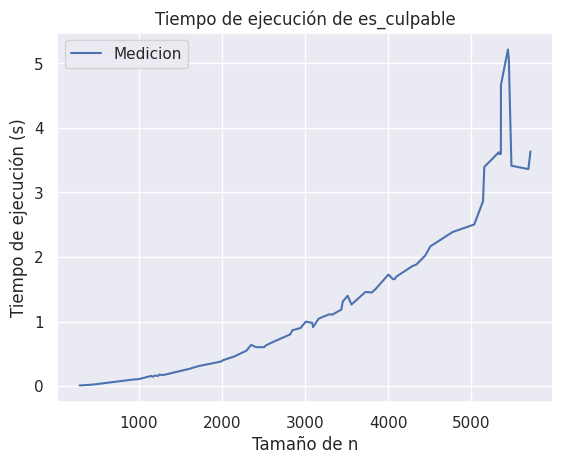

In [98]:
ax: plt.Axes
fig, ax = plt.subplots()

nombres = [acortar(archivo) for archivo in archivos]
# usamos nombres para poner en el eje x, y archivos para que funcione con la funcion es_culpable
ax.plot(nombres, [results[i] for i in archivos], label="Medicion")
ax.set_title("Tiempo de ejecución de es_culpable")
ax.set_xlabel("Tamaño de n")
ax.set_ylabel("Tiempo de ejecución (s)")
ax.legend()

f(x) = c1 * x^2 + c2
c1 = 1.284278801083616e-07, c2 = -0.1684646530764129


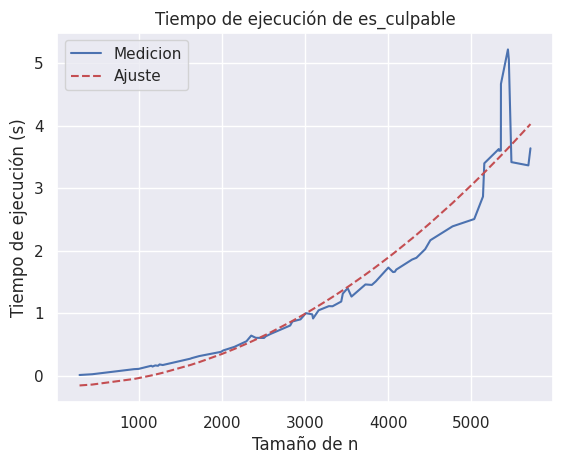

In [99]:
f = lambda x, c1, c2: c1 * (x ** 2) + c2
# usamos nombres para poner en el eje x, y archivos para que funcione con la funcion es_culpable
c, _ = sp.optimize.curve_fit(f, nombres, [results[i] for i in archivos])
# errors = [np.abs(c[0] * (x ** 2) + c[1] - results[x]) for x in archivos]
print("f(x) = c1 * x^2 + c2")
print(f"c1 = {c[0]}, c2 = {c[1]}")

ax.plot(nombres, [c[0] * (x ** 2) + c[1] for x in nombres], "r--", label="Ajuste")
ax.legend()
fig

Text(0, 0.5, 'Error absoluto (s)')

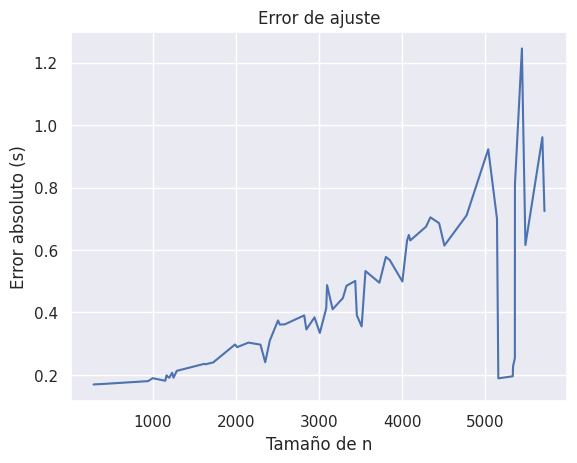

In [100]:
errors = [np.abs(c[0] * (acortar(x) ** 2) - c[1] - results[x]) for x in archivos]
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(nombres, errors)
ax.set_title("Error de ajuste")
ax.set_xlabel("Tamaño de n")
ax.set_ylabel("Error absoluto (s)")